In [44]:
import pandas as pd
from pandas.api.types import is_object_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_percentage_error, log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df = df.drop(columns=['Name'])
df.head(10)

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0
5,6,67,Male,New York,15,82.65,456,1
6,7,30,Female,Chicago,3,73.79,269,0
7,8,67,Female,Miami,1,97.70,396,1
8,9,20,Female,Miami,10,42.45,150,1
9,10,53,Female,Los Angeles,12,64.49,383,1


In [68]:
def basic_report(df):
    print(f'Shape of df: {df.shape}')
    print()
    print(f'Dimension of df: {df.ndim}')
    print()
    print(f'Info of df:')
    display(df.info())
    print()
    print(f'Description of df:')
    display(df.describe())
    print()
    print('Null values of df:')
    display(df.isnull().sum())
    print()
    print('Missing values of df:')
    display(df.isna().sum())
    print()
    print('Duplicate values of df:')
    display( df.duplicated().sum())
    
basic_report(df)

Shape of df: (100000, 10)

Dimension of df: 2

Info of df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Age                         100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Churn                       100000 non-null  int64  
 5   Gender_Male                 100000 non-null  float64
 6   Location_Houston            100000 non-null  float64
 7   Location_Los_Angeles        100000 non-null  float64
 8   Location_Miami              100000 non-null  float64
 9   Location_New_York           100000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 7.6 MB


None


Description of df:


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Churn,Gender_Male,Location_Houston,Location_Los_Angeles,Location_Miami,Location_New_York
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,0.497790,0.497840,0.201570,0.201570,0.200310,0.198130
std,28867.657797,15.280283,6.926461,20.230696,0.499998,0.499998,0.401175,0.401175,0.400234,0.398593
min,1.000000,18.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100000.000000,70.000000,24.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Null values of df:


CustomerID                    0
Age                           0
Subscription_Length_Months    0
Monthly_Bill                  0
Churn                         0
Gender_Male                   0
Location_Houston              0
Location_Los_Angeles          0
Location_Miami                0
Location_New_York             0
dtype: int64


Missing values of df:


CustomerID                    0
Age                           0
Subscription_Length_Months    0
Monthly_Bill                  0
Churn                         0
Gender_Male                   0
Location_Houston              0
Location_Los_Angeles          0
Location_Miami                0
Location_New_York             0
dtype: int64


Duplicate values of df:


0

In [4]:
def cat_columns(df):
    cat_column = []
    print(f'ALL columns: {df.columns}')
    print()
    for i,c in enumerate(df.columns):
        if is_object_dtype(df[c]):
            cat_column.append(c)
            print(c,':')
            print(df[c].unique())
            print(df[c].nunique())
            print()
        else:
            pass
   
    return cat_column


cat_column = cat_columns(df)

ALL columns: Index(['CustomerID', 'Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

Gender :
['Male' 'Female']
2

Location :
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
5



In [5]:
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_GL = ohe.fit_transform(df[['Gender','Location']])

ohe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Chicago', 'Houston', 'Los Angeles', 'Miami', 'New York'],
       dtype=object)]

In [6]:
df['Gender_Male'] = ohe_GL[:,0] # Gender_Male
df['Location_Houston'] = ohe_GL[:,1] # Location_Houston
df['Location_Los_Angeles'] = ohe_GL[:,1] # Location_Los_Angeles
df['Location_Miami'] = ohe_GL[:,3] # Location_Miami
df['Location_New_York'] = ohe_GL[:,4] # Location_New_York

In [70]:
df = df.drop(columns=['Gender','Location'])
df = df.drop(columns=['Total_Usage_GB'])

df.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Churn,Gender_Male,Location_Houston,Location_Los_Angeles,Location_Miami,Location_New_York
0,1,63,17,73.36,0,1.0,0.0,0.0,0.0,0.0
1,2,62,1,48.76,0,0.0,0.0,0.0,0.0,1.0
2,3,24,5,85.47,0,0.0,0.0,0.0,0.0,0.0
3,4,36,3,97.94,1,0.0,0.0,0.0,1.0,0.0
4,5,46,19,58.14,0,0.0,0.0,0.0,1.0,0.0


In [71]:
X = df.drop(columns=['Churn'])
y = df.iloc[:,5]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((80000, 9), (20000, 9), (80000,), (20000,))

In [83]:
X_train.columns

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Gender_Male', 'Location_Houston', 'Location_Los_Angeles',
       'Location_Miami', 'Location_New_York'],
      dtype='object')

In [73]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred = clf.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)*100 # , accuracy_score(y_test, y_pred_rlf)

100.0

(-9e-11, 1e-10)

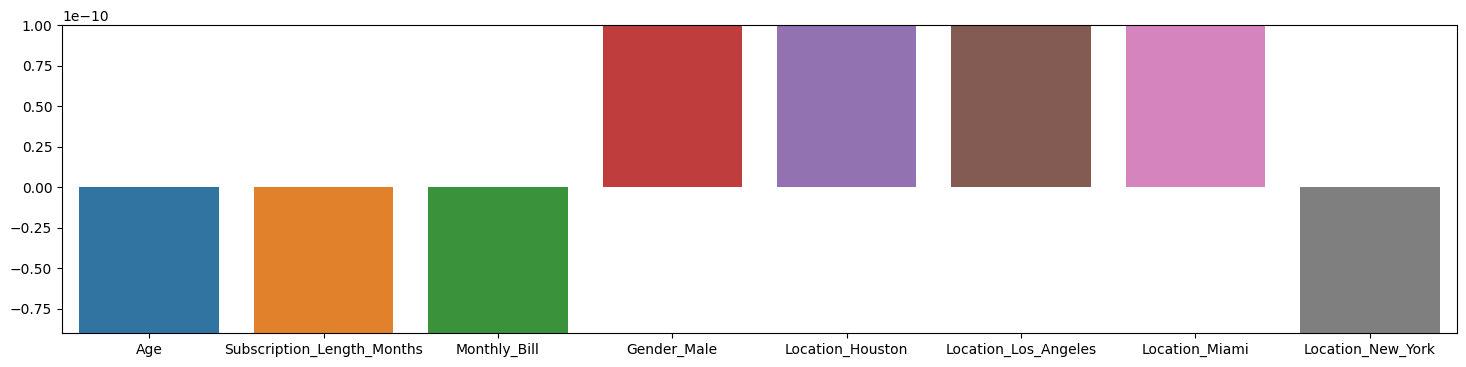

In [76]:
plt.figure(figsize=(18,4))
sns.barplot(x=X_train.columns.tolist()[1:], y=clf.coef_[0][1:])
plt.ylim(-0.00000000009,0.0000000001)

In [77]:
df.corr()["Churn"]

CustomerID                   -0.004586
Age                           0.001559
Subscription_Length_Months    0.002328
Monthly_Bill                 -0.000211
Churn                         1.000000
Gender_Male                   0.002121
Location_Houston             -0.006728
Location_Los_Angeles         -0.006728
Location_Miami                0.005235
Location_New_York             0.005835
Name: Churn, dtype: float64

In [78]:
precision_score(y_test,y_pred), recall_score(y_test,y_pred)

(1.0, 1.0)

In [79]:
confusion_matrix(y_test, y_pred)

array([[10037,     0],
       [    0,  9963]], dtype=int64)

In [80]:
import pickle

In [84]:
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

In [82]:
with open("onehotencoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

In [23]:
df.columns

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Churn', 'Gender_Male', 'Location_Houston', 'Location_Los_Angeles',
       'Location_Miami', 'Location_New_York'],
      dtype='object')

In [41]:
input_array = pd.DataFrame(np.array(['CustomerID','Name','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Gender','Location'])).T

In [42]:
input_array.columns = ['CustomerID','Name','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Gender','Location']

In [43]:
input_array

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender,Location
0,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender,Location
